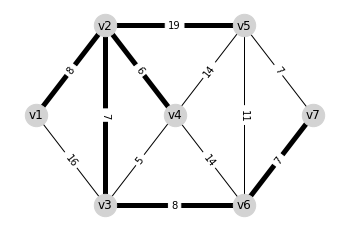

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

weighted_elist = [('v1','v2',8), ('v1','v3',16), ('v2','v3',7),
                  ('v2','v4',6), ('v2','v5',19), ('v3','v4',5),
                  ('v3','v6',8), ('v4','v5',14), ('v4','v6',14),
                  ('v5','v6',11), ('v5','v7',7), ('v6','v7',7)]
p = {'v1':(0,1),'v2':(1,2),'v3':(1,0),'v4':(2,1),'v5':(3,2),
     'v6':(3,0),'v7':(4,1)}
G = nx.Graph()
G.add_weighted_edges_from(weighted_elist)
elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}

s = 'v1'
nodes = set(G.nodes()) - {s}
T = set({})
for v in nodes:
  sp = nx.dijkstra_path(G,s,v)
  T=T.union({tuple(x) for x in np.array([sp[:-1],sp[1:]]).T})
T = list(T)

nx.draw_networkx(G, pos=p, node_color='lightgrey',
                 node_size=500, width=1)
nx.draw_networkx_edges(G, pos=p, edgelist=T, width=5)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels=elbs)
plt.axis('off')
plt.show()